# Data Loading
Load cars data for price analysis and prediction from the [UCI computer science school corpus](https://archive.ics.uci.edu/ml/machine-learning-databases/autos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import model_selection as ms

In [2]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data wrangling

Analyse the data and apply the following transformation: 
* deal with missing data (drop or replace data),
* correct columns data type,
* data standardization to deal with type problem due to data integration,
* data normalization for variables' scaling, and
* binning to transform continuous variables into discrete ones for grouped analysis.


### Missing Values

In [3]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [5]:
#replace the missing values by the means for some columns
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean(axis = 0), inplace = True)
df['bore'].replace(np.nan, df['bore'].astype('float').mean(axis=0), inplace= True)
df['stroke'].replace(np.nan, df['stroke'].astype('float').mean(axis=0), inplace= True)
df['horsepower'].replace(np.nan, df['horsepower'].astype('float').mean(axis=0), inplace= True)
df['peak-rpm'].replace(np.nan, df['peak-rpm'].astype('float').mean(axis=0), inplace= True)

In [6]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [7]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace = True)

Since we want to analyse the car prince, lets delete all rows with missing price

In [8]:
# delete rows with NaN in the "price" column
df.dropna(subset=["price"], axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [9]:
# check that no missing values left
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

### Data type Correction

In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [11]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].astype("int64")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### Data Standardization

The fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon). Transform mpg to L/100km

In [12]:
df['city-L/100km'] = 235/df["city-mpg"]
df['highway/100km'] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


### Data Normalization

In [13]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

# Price prediction

To predict a car's price, it would be intrestring to see what features influence the price and how (negative or positive influence). It is possible to plot the data and see the correlation, if it exists, between some features and the price.

## Variables Correlation vs. Price

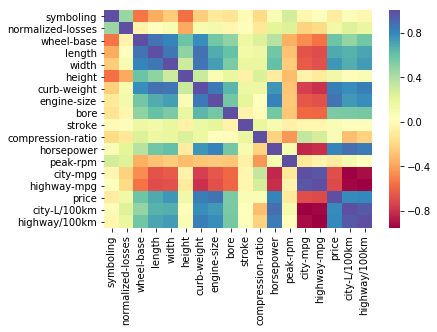

In [14]:
# plot the heatmap
sns.heatmap(df.corr(method='pearson'), cmap='Spectral')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C323300710>,
      dtype=object)

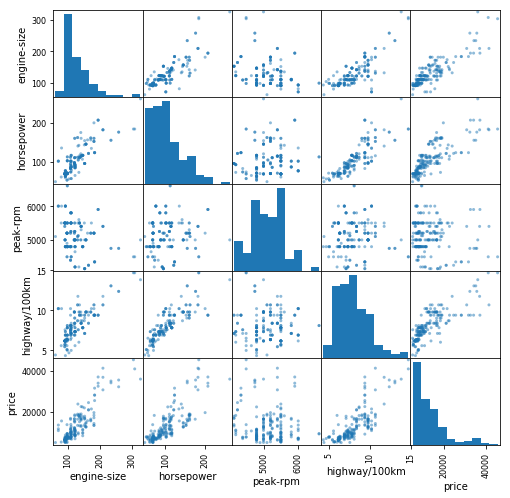

In [26]:
pd.plotting.scatter_matrix(df[["engine-size","horsepower", "peak-rpm", "highway/100km","price"]], figsize=(8, 8))

## Regression Model

### Simple Regression

Split the data into training and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[["highway-mpg"]], df["price"], test_size=0.2, random_state=1) 

0.4446574660079584
0.4446574660079584


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


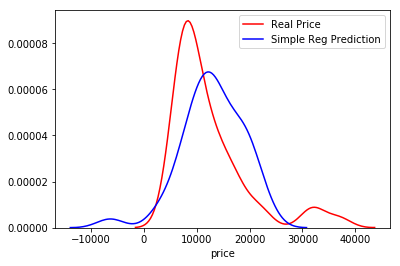

In [53]:
# simple linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
ypred=reg.predict(X_test)
print(reg.score(X_test, y_test))    #RSquared
# Compute RSquared
ybar = pd.DataFrame({"ymean":np.ones((len(y_test),), dtype=int)*y_test.mean()})
mseReg=mean_squared_error(y_test, ypred)
mseBar=mean_squared_error(y_test, ybar)
print(1-(mseReg/mseBar))
sns.distplot(y_test, hist=False, label="Real Price", color="r")
sns.distplot(ypred, hist=False, label="Simple Reg Prediction", color="b")

The following test shows predicted **negative** prices which mean that the model is not a good predictor.

In [18]:
Xtest=np.arange(1,101,1).reshape(-1,1)
yTestPred=reg.predict(Xtest)
yTestPred

array([ 38415.28267242,  37570.27987766,  36725.2770829 ,  35880.27428815,
        35035.27149339,  34190.26869863,  33345.26590387,  32500.26310912,
        31655.26031436,  30810.2575196 ,  29965.25472484,  29120.25193009,
        28275.24913533,  27430.24634057,  26585.24354581,  25740.24075106,
        24895.2379563 ,  24050.23516154,  23205.23236678,  22360.22957203,
        21515.22677727,  20670.22398251,  19825.22118775,  18980.218393  ,
        18135.21559824,  17290.21280348,  16445.21000873,  15600.20721397,
        14755.20441921,  13910.20162445,  13065.1988297 ,  12220.19603494,
        11375.19324018,  10530.19044542,   9685.18765067,   8840.18485591,
         7995.18206115,   7150.17926639,   6305.17647164,   5460.17367688,
         4615.17088212,   3770.16808736,   2925.16529261,   2080.16249785,
         1235.15970309,    390.15690833,   -454.84588642,  -1299.84868118,
        -2144.85147594,  -2989.8542707 ,  -3834.85706545,  -4679.85986021,
        -5524.86265497,  

### Multi Variables Regression

In [19]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(df[["horsepower","curb-weight","engine-size","highway-mpg"]], df["price"], test_size=0.2, random_state=1) 

In [33]:
# multi-variables linear regression
mulReg = LinearRegression()
mulReg.fit(X_trainm, y_trainm)
ypredmul=mulReg.predict(X_testm)
print("RSquared: ", mulReg.score(X_testm, y_testm))    #RSquared

# test if the scaling improves the model
scale=StandardScaler()
X_trainm_scale=scale.fit_transform(X_trainm.astype("float"))
X_testm_scale=scale.fit_transform(X_testm.astype("float"))

mulReg2 = LinearRegression()
mulReg2.fit(X_trainm_scale, y_trainm)
ypredmul2=mulReg2.predict(X_testm_scale)
print("RSquared without scaling: ",mulReg2.score(X_testm_scale, y_testm))    #RSquared


RSquared:  0.7429209504885692
RSquared without scaling:  0.6932984783880289


### Polynomial Regression

In [21]:
X_trainmp, X_testmp, y_trainmp, y_testmp = train_test_split(df[["highway-mpg","curb-weight","horsepower", "engine-size"]], df["price"], test_size=0.2, random_state=1) 

In [34]:
# polynomial regression
# Normalization
scale=StandardScaler() 
X_trainmp_scale=scale.fit_transform(X_trainmp.astype("float"))
X_testmp_scale=scale.fit_transform(X_testmp.astype("float"))
# polynomial
pr=PolynomialFeatures(degree=2)
X_trainmp_poly=pr.fit_transform(X_trainmp)
X_testmp_poly=pr.fit_transform(X_testmp)
#training
mulRegPoly = LinearRegression()
mulRegPoly.fit(X_trainmp_poly, y_trainmp)
ypredmulpoly=mulRegPoly.predict(X_testmp_poly)
print("RSquared: ",mulRegPoly.score(X_testmp_poly,y_testmp))  #RSquared

RSquared:  0.7612352617026659


In [35]:
# use a pipeline for normalized polynomial regression
Input=[("scale", StandardScaler()),("poly", PolynomialFeatures(degree=2)),
       ("model", LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_trainmp.astype("float"),y_trainmp)
yPredPipe=pipe.predict(X_testmp.astype("float"))
print("RSquared: ",pipe.score(X_testmp.astype("float"),y_testmp))    #RSquared

RSquared:  0.7612352616967111


[0.78743776 0.73705625 0.55851777]
Rsquared:  0.7515515710703502


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


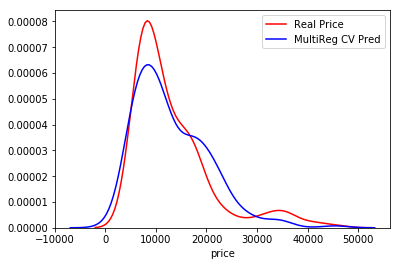

In [55]:
# Using a cross validation set 
X=df[["highway-mpg","curb-weight","horsepower", "engine-size"]]
y=df["price"]
lr = LinearRegression()
scores=ms.cross_val_score(lr, X, y, cv=3)
print(scores)
ypredcvs=ms.cross_val_predict(lr, X, y, cv=3)
sns.distplot(y, hist=False, label="Real Price", color="r")
sns.distplot(ypredcvs, hist=False, label="MultiReg CV Pred", color="b")
ybar = pd.DataFrame({"ymean":np.ones((len(y),), dtype=int)*y.mean()})
mseReg=mean_squared_error(y, ypredcvs)
mseBar=mean_squared_error(y, ybar)
print("Rsquared: ",1-(mseReg/mseBar))    # Rsquared

## Model Evaluation

### Distribution Plot

The multivariable regression gives a better prediction of the price and the polynomial regression fits even better the price.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


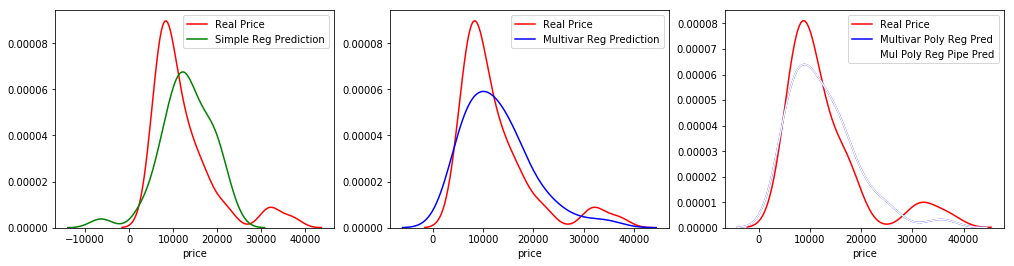

In [56]:
plt.figure(figsize=(17, 4))
plt.subplot(131)
sns.distplot(y_test, hist=False, label="Real Price", color="r")
sns.distplot(ypred, hist=False, label="Simple Reg Prediction", color="g")
plt.subplot(132)
sns.distplot(y_testm, hist=False, label="Real Price", color="r")
sns.distplot(ypredmul, hist=False, label="Multivar Reg Prediction", color="b")
plt.subplot(133)
sns.distplot(y_testmp, hist=False, label="Real Price", color="r")
sns.distplot(ypredmulpoly, hist=False, label="Multivar Poly Reg Pred", color="b")
sns.distplot(yPredPipe, hist=False, label="Mul Poly Reg Pipe Pred", color="w")

### Residual Plot

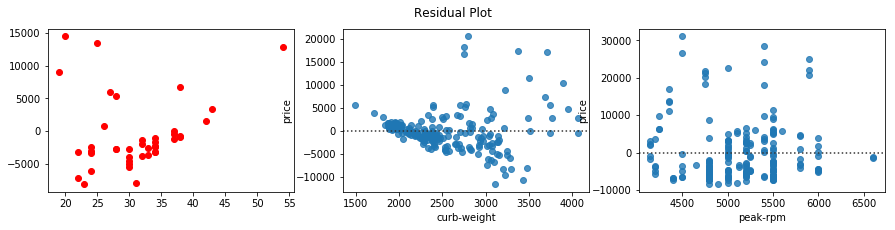

In [57]:
plt.figure(1, figsize=(15, 3))
plt.subplot(131)
plt.plot(X_test, y_test-ypred, "ro")
plt.subplot(132)
sns.residplot(df["curb-weight"], df["price"])
plt.subplot(133)
sns.residplot(df["peak-rpm"], df["price"])
plt.suptitle('Residual Plot')
plt.show()

## Choose the Polynomial degree

As shown in the previous tests, the polynomial multivar regression seems to give the better model. The remaining is to choose the good poly degree in order to avoid *overfitting* and *underfitting* using a cross validation sets.
We conclude that the suitable poly degree is 2 since a degre>=4 leads to overfitting.

0.8263784381197388


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


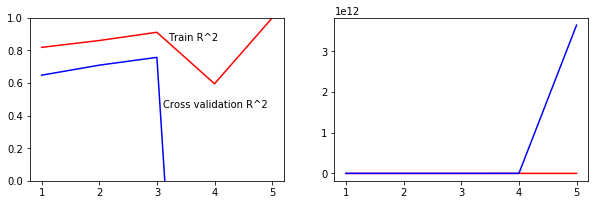

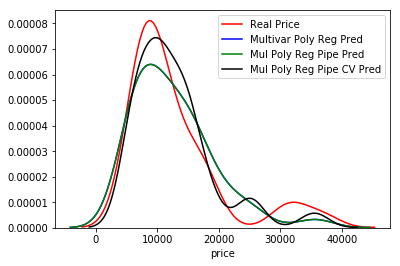

In [58]:
# Split the data into train, cross validation and test sets
X_trainmp, X_testmp, y_trainmp, y_testmp = train_test_split(df[["highway-mpg","curb-weight","horsepower", "engine-size"]], 
                                                            df["price"], test_size=0.3, random_state=1) 
X_testmp, X_cvmp, y_testmp, y_cvmp = train_test_split(X_testmp, y_testmp, test_size=0.5, random_state=1)
# Evaluate the  model for different polynomial degrees
rsquared_train=[];   rsquared_cv=[]
mse_tr=[];   mse_cv=[]
degree=[1,2,3,4,5] 
for n in degree:
    Input=[("scale", StandardScaler()),("poly", PolynomialFeatures(degree=n)),("model", LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(X_trainmp.astype("float"),y_trainmp)
    yPtr=pipe.predict(X_trainmp.astype("float"))
    yPcv=pipe.predict(X_cvmp.astype("float"))
    rsquared_train.append(pipe.score(X_trainmp.astype("float"),y_trainmp))  #RSquared
    rsquared_cv.append(pipe.score(X_cvmp.astype("float"),y_cvmp))    #RSquared
    mse_tr.append(mean_squared_error(y_trainmp, yPtr))
    mse_cv.append(mean_squared_error(y_cvmp, yPcv))
# plot the data the choose the best degree    
plt.figure(1, figsize=(10, 3))
plt.subplot(121)
plt.text(3.1, 0.45, "Cross validation R^2") 
plt.text(3.2, 0.86, "Train R^2") 
plt.plot(degree, rsquared_train, "r", degree, rsquared_cv, "b")
plt.ylim([0,1])
plt.subplot(122)
plt.plot(degree, mse_tr, "r", degree, mse_cv, "b")
# Test the model
Input=[("scale", StandardScaler()),("poly", PolynomialFeatures(degree=2)),("model", LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_trainmp.astype("float"),y_trainmp)
yPts=pipe.predict(X_testmp.astype("float"))
print(pipe.score(X_testmp, y_testmp))
plt.figure(2)
sns.distplot(y_testmp, hist=False, label="Real Price", color="r")
sns.distplot(ypredmulpoly, hist=False, label="Multivar Poly Reg Pred", color="b")
sns.distplot(yPredPipe, hist=False, label="Mul Poly Reg Pipe Pred", color="g")
sns.distplot(yPts, hist=False, label="Mul Poly Reg Pipe CV Pred", color="k")